## Load Data


In [ ]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
import numpy as np
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)


In [ ]:
batch_size = 512
num_epochs = 300
lr = 0.01


In [ ]:
train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size)


## Modeling


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        x = self.layer3(x)
        x = self.sigmoid(x)
        x = self.layer4(x)
        x = self.sigmoid(x)
        x = self.layer5(x)
        x = self.sigmoid(x)
        out = self.output(x)
        return out


## ADAM


In [22]:
def train_with_optimizer (model, criterion, optimizer, train_loader=train_loader, test_loader = test_loader):
    batch_size = 512
    num_epochs = 50
    lr = 0.01
    train_losses = []
    train_acc = []
    val_losses = []
    val_acc = []
    for epoch in range(num_epochs):
        model.train()
        t_loss = 0
        t_acc = 0
        cnt = 0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            t_loss += loss.item()
            t_acc += (torch.argmax(outputs, 1) == y).sum().item()
            cnt += len(y)
        t_loss /= len(train_loader)
        train_losses.append(t_loss)
        t_acc /= cnt
        train_acc.append(t_acc)

        model.eval()
        v_loss = 0
        v_acc = 0
        cnt = 0
        with torch.no_grad():
            for X, y in test_loader:
                X, y = X.to(device), y.to(device)
                outputs = model(X)
                loss = criterion(outputs, y)
                v_loss += loss.item()
                v_acc += (torch.argmax(outputs, 1)==y).sum().item()
                cnt += len(y)
        v_loss /= len(test_loader)
        val_losses.append(v_loss)
        v_acc /= cnt
        val_acc.append(v_acc)
        print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {t_loss:.4f}, Train_Acc: {t_acc:.4f}, Validation Loss: {v_loss:.4f}, Val_Acc: {v_acc:.4f}")

    return train_losses, train_acc, val_losses, val_acc


In [23]:
import matplotlib.pyplot as plt

def plot(train_losses, train_acc, val_losses, val_acc):
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    ax[0, 0].plot(train_losses)
    ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
    ax[0, 0].set_title('Training Loss')

    ax[0, 1].plot(val_losses, 'orange')
    ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
    ax[0, 1].set_title('Validation Loss')

    ax[1, 0].plot(train_acc)
    ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
    ax[1, 0].set_title('Training Accuracy')

    ax[1, 1].plot(val_acc, 'orange')
    ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
    ax[1, 1].set_title('Validation Accuracy')

    plt.show()


# Experiment


## Adam


Epoch 1/50, Train_Loss: 1.7183, Train_Acc: 0.2352, Validation Loss: 1.1887, Val_Acc: 0.4358
Epoch 2/50, Train_Loss: 0.8233, Train_Acc: 0.6739, Validation Loss: 0.6687, Val_Acc: 0.7744
Epoch 3/50, Train_Loss: 0.6117, Train_Acc: 0.7889, Validation Loss: 0.5824, Val_Acc: 0.7930
Epoch 4/50, Train_Loss: 0.5203, Train_Acc: 0.8125, Validation Loss: 0.5606, Val_Acc: 0.7951
Epoch 5/50, Train_Loss: 0.4576, Train_Acc: 0.8304, Validation Loss: 0.4702, Val_Acc: 0.8381
Epoch 6/50, Train_Loss: 0.4044, Train_Acc: 0.8592, Validation Loss: 0.4624, Val_Acc: 0.8383
Epoch 7/50, Train_Loss: 0.3735, Train_Acc: 0.8692, Validation Loss: 0.4092, Val_Acc: 0.8607
Epoch 8/50, Train_Loss: 0.3554, Train_Acc: 0.8739, Validation Loss: 0.4225, Val_Acc: 0.8487
Epoch 9/50, Train_Loss: 0.3487, Train_Acc: 0.8763, Validation Loss: 0.3922, Val_Acc: 0.8639
Epoch 10/50, Train_Loss: 0.3338, Train_Acc: 0.8805, Validation Loss: 0.4191, Val_Acc: 0.8498
Epoch 11/50, Train_Loss: 0.3244, Train_Acc: 0.8842, Validation Loss: 0.4013, Va

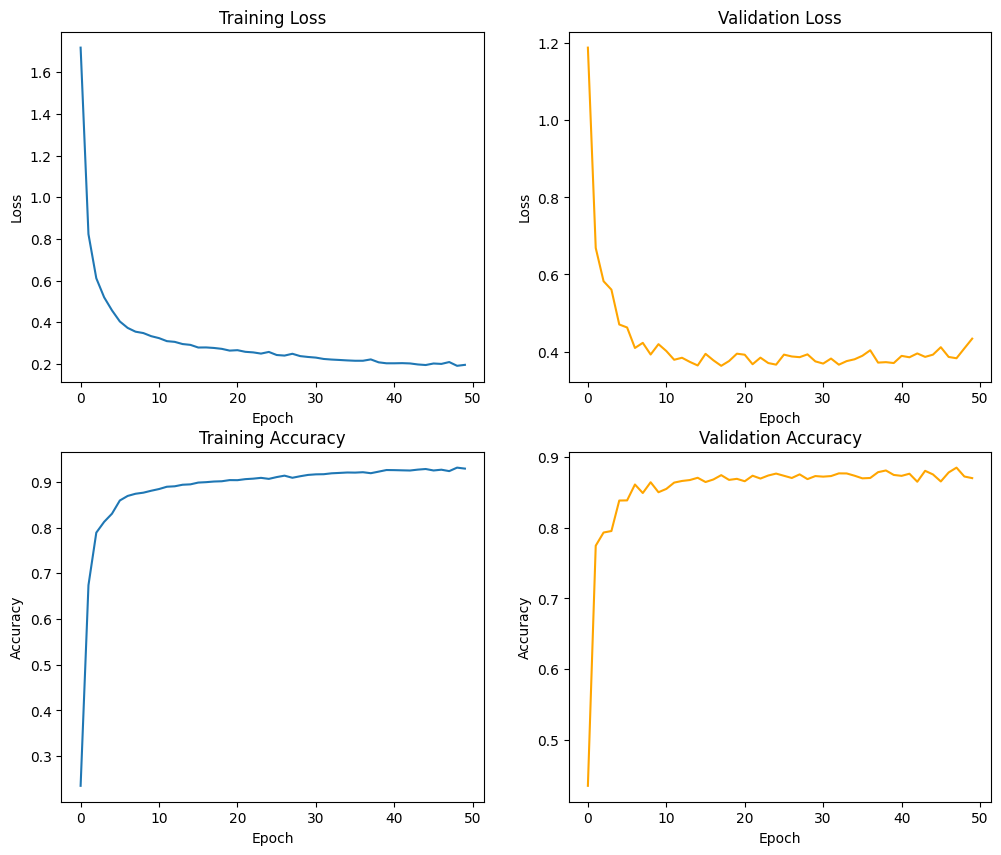

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
train_losses, train_acc, val_losses, val_acc = train_with_optimizer(model, criterion, optimizer)
plot(train_losses, train_acc, val_losses, val_acc)


## SGD


Epoch 1/50, Train_Loss: 2.3106, Train_Acc: 0.0999, Validation Loss: 2.3028, Val_Acc: 0.1000
Epoch 2/50, Train_Loss: 2.3028, Train_Acc: 0.0977, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 3/50, Train_Loss: 2.3028, Train_Acc: 0.0999, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 4/50, Train_Loss: 2.3028, Train_Acc: 0.0992, Validation Loss: 2.3028, Val_Acc: 0.1000
Epoch 5/50, Train_Loss: 2.3028, Train_Acc: 0.0988, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 6/50, Train_Loss: 2.3028, Train_Acc: 0.0997, Validation Loss: 2.3029, Val_Acc: 0.1000
Epoch 7/50, Train_Loss: 2.3029, Train_Acc: 0.0965, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 8/50, Train_Loss: 2.3028, Train_Acc: 0.0992, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 9/50, Train_Loss: 2.3028, Train_Acc: 0.0979, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 10/50, Train_Loss: 2.3028, Train_Acc: 0.0990, Validation Loss: 2.3028, Val_Acc: 0.1000
Epoch 11/50, Train_Loss: 2.3028, Train_Acc: 0.0995, Validation Loss: 2.3029, Va

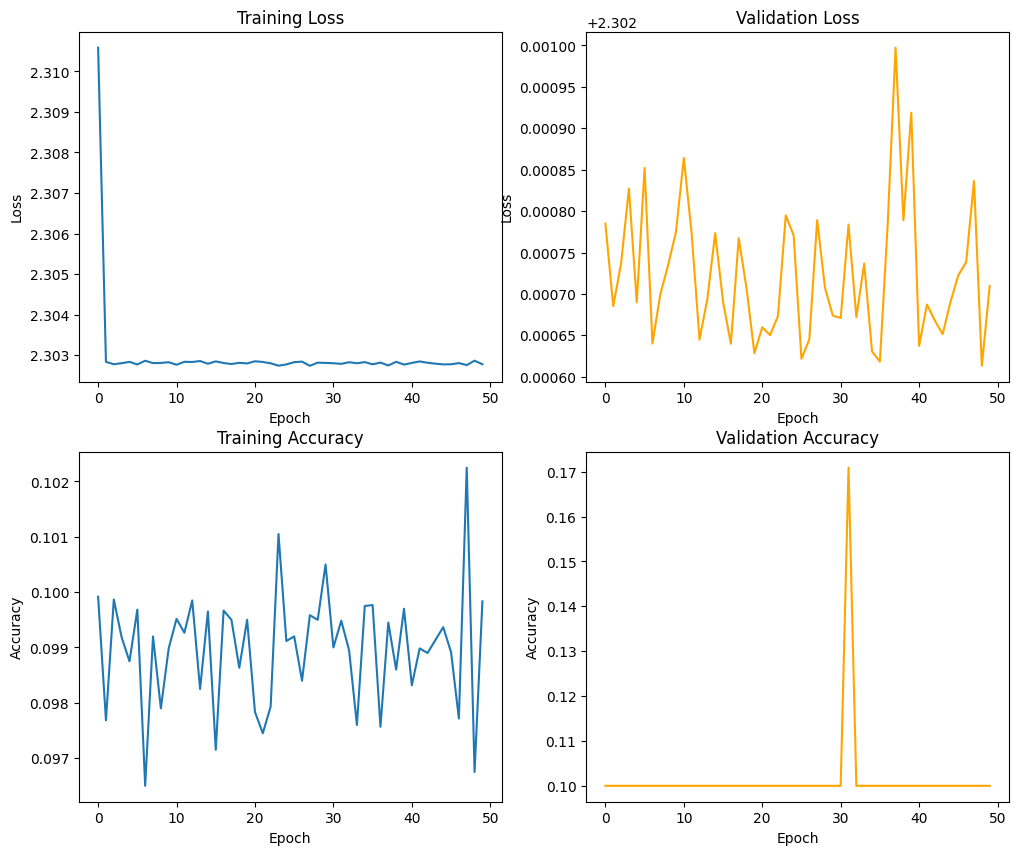

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
train_losses, train_acc, val_losses, val_acc = train_with_optimizer(model, criterion, optimizer)
plot(train_losses, train_acc, val_losses, val_acc)


## SGD + Momentun


Epoch 1/50, Train_Loss: 2.3058, Train_Acc: 0.0992, Validation Loss: 2.3045, Val_Acc: 0.1000
Epoch 2/50, Train_Loss: 2.3042, Train_Acc: 0.1011, Validation Loss: 2.3040, Val_Acc: 0.1000
Epoch 3/50, Train_Loss: 2.3042, Train_Acc: 0.1011, Validation Loss: 2.3047, Val_Acc: 0.1000
Epoch 4/50, Train_Loss: 2.3042, Train_Acc: 0.1007, Validation Loss: 2.3034, Val_Acc: 0.1000
Epoch 5/50, Train_Loss: 2.3045, Train_Acc: 0.0979, Validation Loss: 2.3037, Val_Acc: 0.1000
Epoch 6/50, Train_Loss: 2.3042, Train_Acc: 0.0995, Validation Loss: 2.3030, Val_Acc: 0.1000
Epoch 7/50, Train_Loss: 2.3044, Train_Acc: 0.0992, Validation Loss: 2.3033, Val_Acc: 0.1000
Epoch 8/50, Train_Loss: 2.3044, Train_Acc: 0.0979, Validation Loss: 2.3031, Val_Acc: 0.1000
Epoch 9/50, Train_Loss: 2.3040, Train_Acc: 0.0983, Validation Loss: 2.3039, Val_Acc: 0.1000
Epoch 10/50, Train_Loss: 2.3041, Train_Acc: 0.1000, Validation Loss: 2.3044, Val_Acc: 0.1000
Epoch 11/50, Train_Loss: 2.3042, Train_Acc: 0.0992, Validation Loss: 2.3046, Va

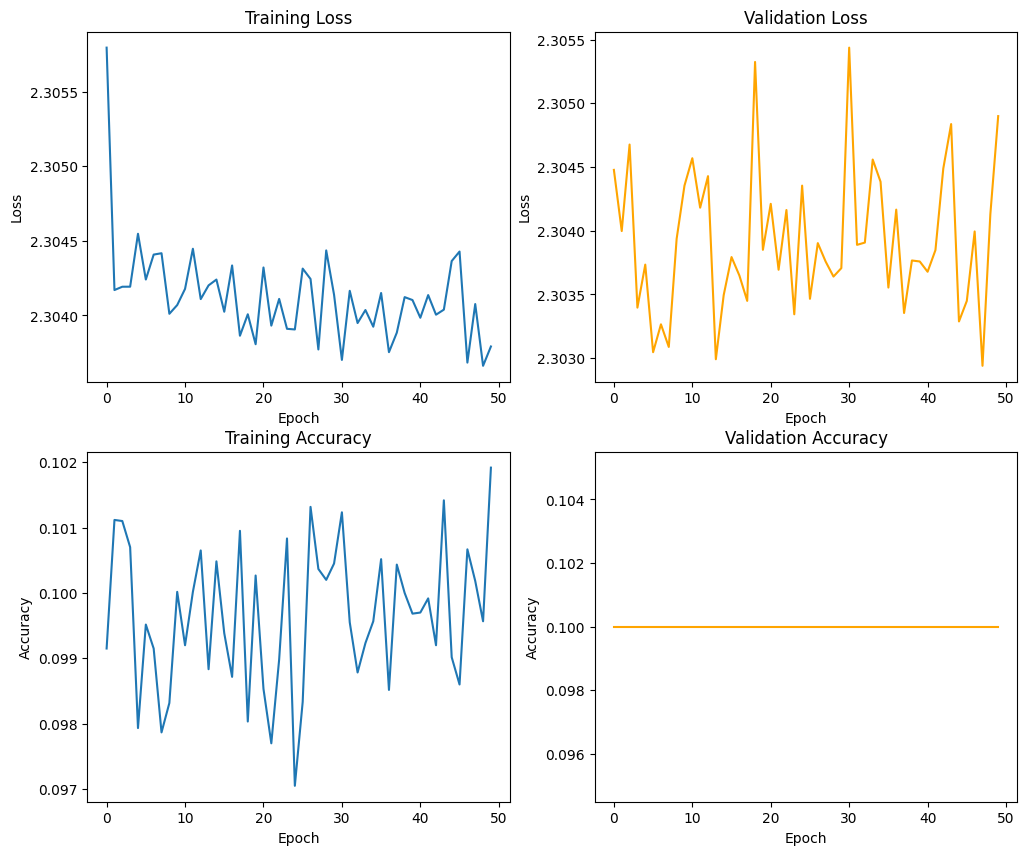

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
train_losses, train_acc, val_losses, val_acc = train_with_optimizer(model, criterion, optimizer)
plot(train_losses, train_acc, val_losses, val_acc)


## RMSProb


Epoch 1/50, Train_Loss: 2.3774, Train_Acc: 0.0970, Validation Loss: 2.3065, Val_Acc: 0.1000
Epoch 2/50, Train_Loss: 2.3039, Train_Acc: 0.1016, Validation Loss: 2.3039, Val_Acc: 0.1000
Epoch 3/50, Train_Loss: 2.3032, Train_Acc: 0.0994, Validation Loss: 2.3028, Val_Acc: 0.1000
Epoch 4/50, Train_Loss: 2.3028, Train_Acc: 0.1006, Validation Loss: 2.3034, Val_Acc: 0.1000
Epoch 5/50, Train_Loss: 2.2907, Train_Acc: 0.1076, Validation Loss: 2.0198, Val_Acc: 0.2000
Epoch 6/50, Train_Loss: 1.6792, Train_Acc: 0.2349, Validation Loss: 1.4237, Val_Acc: 0.3477
Epoch 7/50, Train_Loss: 1.1972, Train_Acc: 0.4296, Validation Loss: 1.5641, Val_Acc: 0.3802
Epoch 8/50, Train_Loss: 1.0304, Train_Acc: 0.5195, Validation Loss: 0.9768, Val_Acc: 0.5393
Epoch 9/50, Train_Loss: 0.9466, Train_Acc: 0.5588, Validation Loss: 0.9287, Val_Acc: 0.6122
Epoch 10/50, Train_Loss: 0.8301, Train_Acc: 0.6483, Validation Loss: 1.2775, Val_Acc: 0.5166
Epoch 11/50, Train_Loss: 0.7180, Train_Acc: 0.7084, Validation Loss: 0.8547, Va

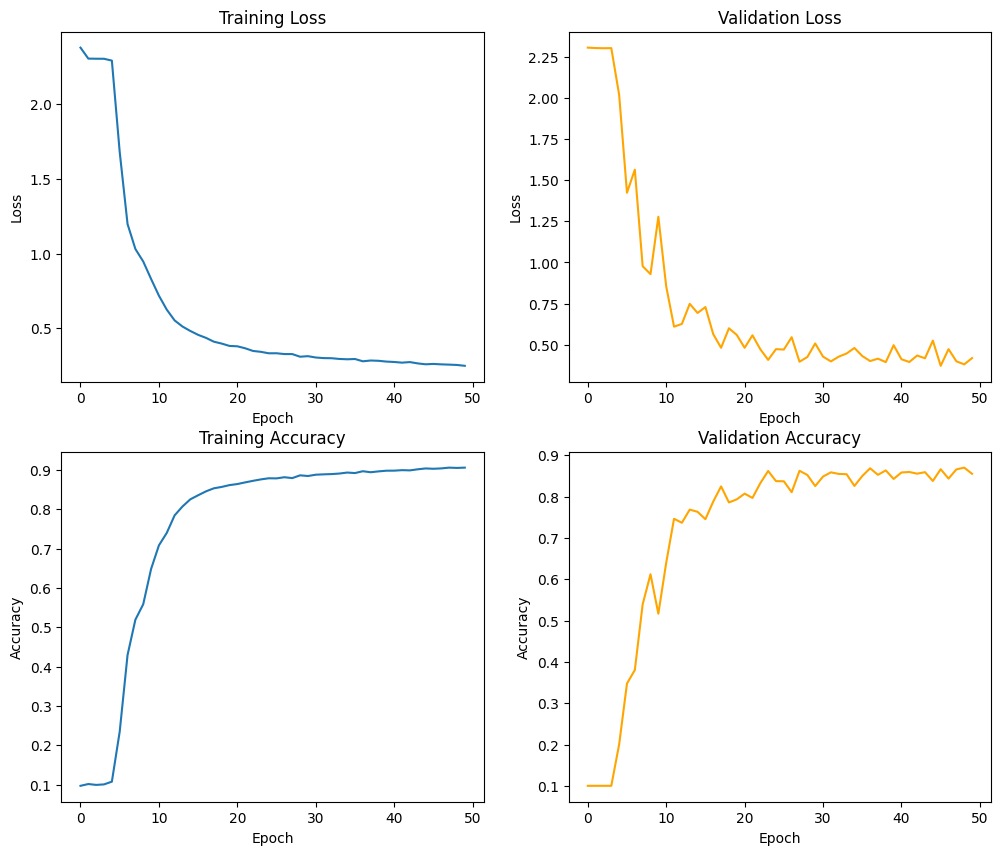

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=lr)
train_losses, train_acc, val_losses, val_acc = train_with_optimizer(model, criterion, optimizer)
plot(train_losses, train_acc, val_losses, val_acc)


## ADOPT


Epoch 1/50, Train_Loss: 1.6615, Train_Acc: 0.2682, Validation Loss: 1.3727, Val_Acc: 0.3769
Epoch 2/50, Train_Loss: 1.2401, Train_Acc: 0.4136, Validation Loss: 1.2084, Val_Acc: 0.4772
Epoch 3/50, Train_Loss: 1.1138, Train_Acc: 0.4887, Validation Loss: 1.0878, Val_Acc: 0.4981
Epoch 4/50, Train_Loss: 1.0347, Train_Acc: 0.5451, Validation Loss: 1.0177, Val_Acc: 0.5198
Epoch 5/50, Train_Loss: 0.9433, Train_Acc: 0.6115, Validation Loss: 0.9040, Val_Acc: 0.6473
Epoch 6/50, Train_Loss: 0.8609, Train_Acc: 0.6567, Validation Loss: 0.8725, Val_Acc: 0.6671
Epoch 7/50, Train_Loss: 0.8152, Train_Acc: 0.6839, Validation Loss: 0.8179, Val_Acc: 0.6819
Epoch 8/50, Train_Loss: 0.7770, Train_Acc: 0.6992, Validation Loss: 0.7766, Val_Acc: 0.7037
Epoch 9/50, Train_Loss: 0.7441, Train_Acc: 0.7119, Validation Loss: 0.7513, Val_Acc: 0.7090
Epoch 10/50, Train_Loss: 0.7193, Train_Acc: 0.7180, Validation Loss: 0.7708, Val_Acc: 0.6846
Epoch 11/50, Train_Loss: 0.7003, Train_Acc: 0.7272, Validation Loss: 0.7068, Va

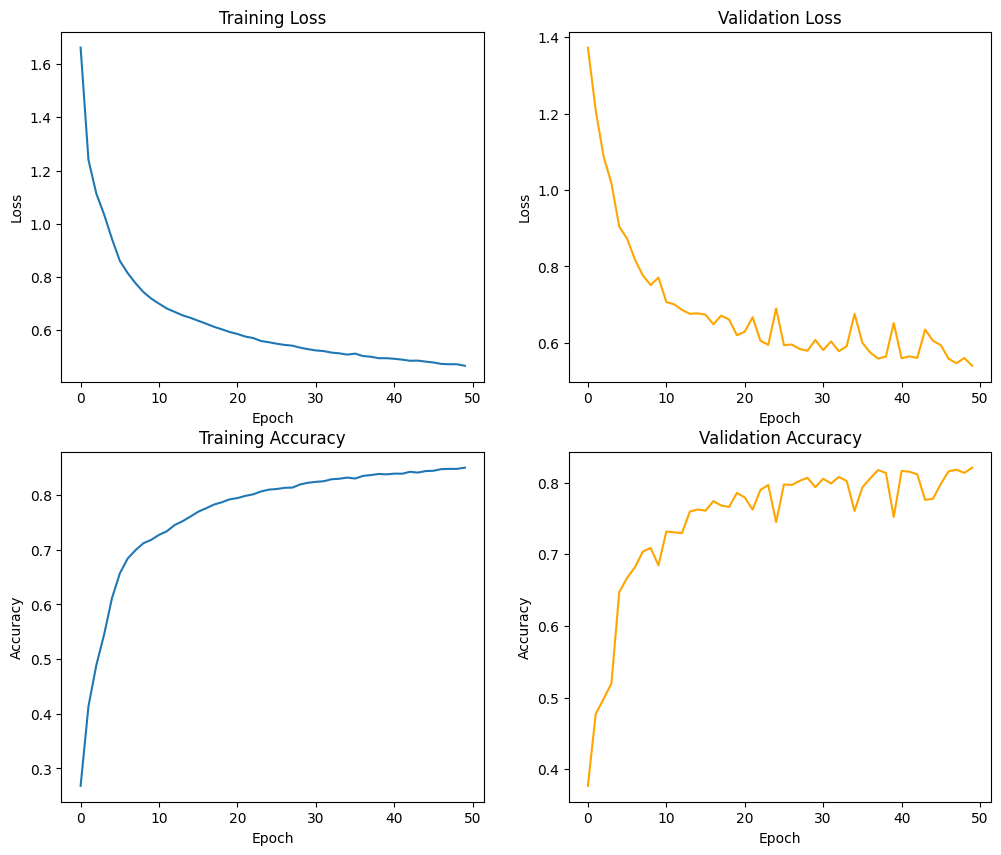

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model.parameters(), lr=lr)
train_losses, train_acc, val_losses, val_acc = train_with_optimizer(model, criterion, optimizer)
plot(train_losses, train_acc, val_losses, val_acc)
